In [1]:
from scipy.io import loadmat, savemat
import os
import numpy as np
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

13it [00:00, 20.61it/s]


[[18.38426223 -4.10088571]
 [18.33998455 -4.14397141]
 [18.09123051 -3.91620768]
 [18.28795813 -4.12098156]
 [17.71200693 -3.88650952]
 [18.36480798 -4.10229658]
 [18.32543159 -4.17015643]
 [16.96336606 -3.47488479]
 [14.46211476 -2.76304499]
 [18.32205615 -4.16697079]
 [16.80448121 -3.47276038]
 [18.35906724 -3.6629631 ]
 [18.41921258 -3.44760611]]


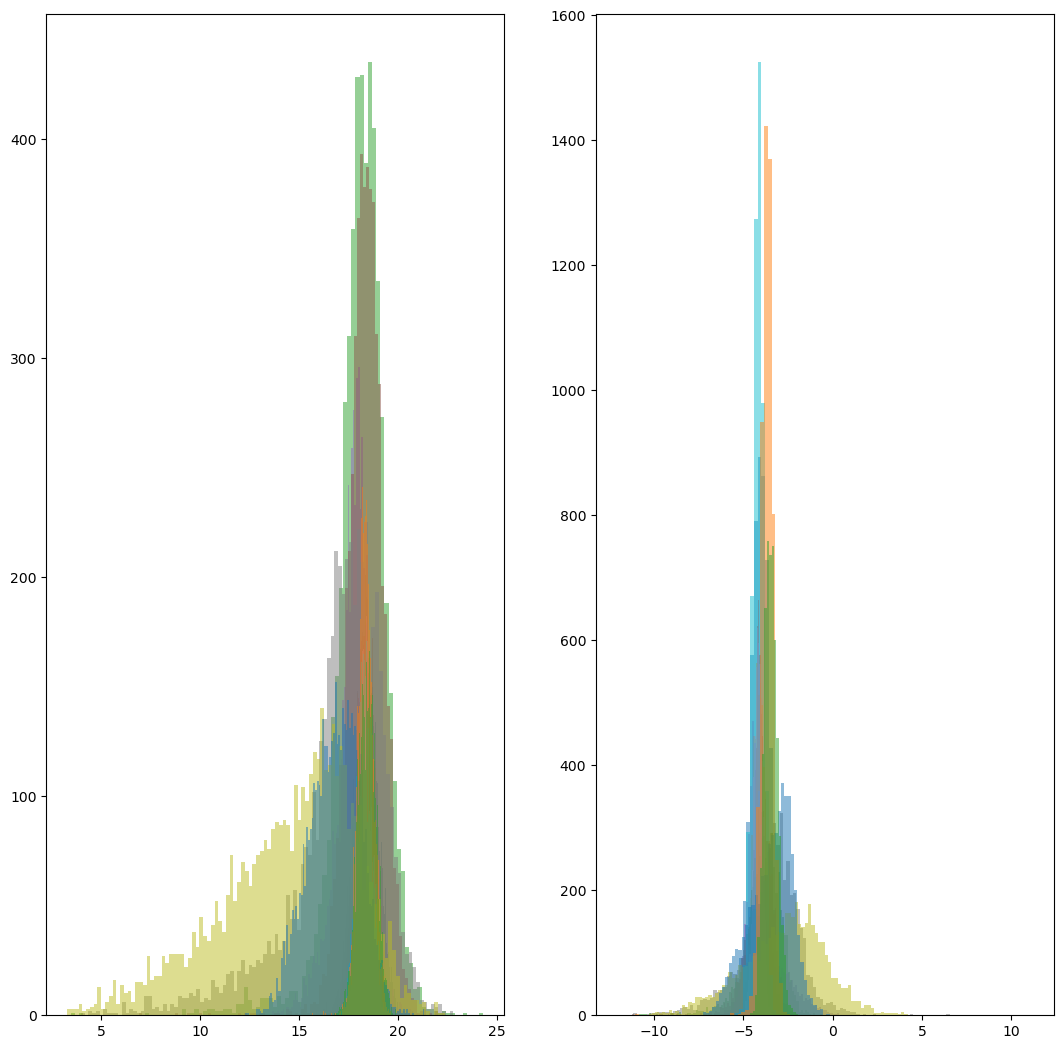

In [2]:
path = './MIS1_SS24_Gruppe4_statisch'
mat_files = [f for f in os.listdir(path) if f.endswith('.txt')]
means = np.zeros((13,2))
plt.figure(figsize=(13,13))
for i,f in tqdm(enumerate(mat_files)):   
    filepath = path + '/' +f
    f1 = pd.read_table(filepath,skiprows=5,decimal=',').astype(float)
    f1 = f1.loc[(f1['Arrival Time{2} [ms]'] != 0.00000) & (f1['Arrival Time [ms]'] != 0.00000)]
    means[i,0],means[i,1] = np.mean(f1['Velocity U [m/s]']), np.mean(f1['Velocity V (PDA){2} [m/s]'])
    plt.subplot(121)
    plt.hist(f1['Velocity U [m/s]'],bins=100,alpha=.5)#'Velocity V (PDA){2} [m/s]'])
    plt.subplot(122)
    plt.hist(f1['Velocity V (PDA){2} [m/s]'],bins=100,alpha=.5)#'Velocity V (PDA){2} [m/s]'])
print(means)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


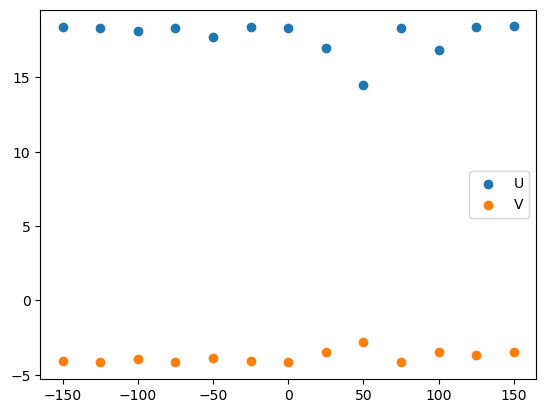

In [3]:
print(np.arange(13))
plt.scatter(-150+25*np.arange(13),means[:,0],label='U')
plt.scatter(-150+25*np.arange(13),means[:,1],label='V')
plt.legend()